In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [3]:
df1=pd.read_csv(r"C:\Users\Acer\Desktop\Python-V\Singapore Resale\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\Acer\Desktop\Python-V\Singapore Resale\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\Acer\Desktop\Python-V\Singapore Resale\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\Acer\Desktop\Python-V\Singapore Resale\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\Acer\Desktop\Python-V\Singapore Resale\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [4]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
919532,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,820000.0,63 years 05 months
919533,2024-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,01 TO 03,154.0,Maisonette,1988,850000.0,63 years 10 months
919534,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62 years 11 months
919535,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62 years 10 months


In [5]:
df.shape

(919537, 11)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919537 entries, 0 to 919536
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                919537 non-null  object 
 1   town                 919537 non-null  object 
 2   flat_type            919537 non-null  object 
 3   block                919537 non-null  object 
 4   street_name          919537 non-null  object 
 5   storey_range         919537 non-null  object 
 6   floor_area_sqm       919537 non-null  float64
 7   flat_model           919537 non-null  object 
 8   lease_commence_date  919537 non-null  int64  
 9   resale_price         919537 non-null  float64
 10  remaining_lease      210487 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.2+ MB


In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,919537.0,95.695831,25.839972,28.0,73.0,93.0,113.0,307.0
lease_commence_date,919537.0,1988.194504,10.578562,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,919537.0,318472.314568,168465.064444,5000.0,192000.0,295000.0,415000.0,1568888.0


In [9]:
df['resale_price'].value_counts()

resale_price
300000.0    6902
350000.0    6800
280000.0    6542
320000.0    6500
250000.0    6282
            ... 
269001.0       1
400998.0       1
299750.0       1
414388.0       1
545555.0       1
Name: count, Length: 9409, dtype: int64

Data Cleaning

In [10]:
df.nunique()

month                   410
town                     27
flat_type                 8
block                  2705
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9409
remaining_lease         721
dtype: int64

In [11]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

#Remaining lease column

In [12]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [14]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
919532,2024-02,YISHUN,EXECUTIVE,387,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,820000.0,63.416667
919533,2024-02,YISHUN,EXECUTIVE,355,YISHUN RING RD,01 TO 03,154.0,Maisonette,1988,850000.0,63.833333
919534,2024-02,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,795000.0,62.916667
919535,2024-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.833333
919536,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667


In [15]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711638
95.000000      2303
67.000000      2209
69.000000      1911
71.000000      1753
              ...  
96.833333         1
97.750000         1
97.583333         1
97.250000         1
41.750000         1
Name: count, Length: 668, dtype: int64

In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

Datatype Format

In [17]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [18]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [19]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
919535,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,935000.0,62.833333,2024,02,7,9
919536,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667,2024,02,4,6


In [20]:
df.drop('storey_range', axis = 1, inplace= True)

In [21]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [22]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [23]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

Errors

In [24]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [25]:
df['town'].value_counts()

town
TAMPINES           79400
YISHUN             69551
BEDOK              66280
JURONG WEST        66133
WOODLANDS          65003
ANG MO KIO         51806
HOUGANG            50320
BUKIT BATOK        43928
CHOA CHU KANG      37952
BUKIT MERAH        34060
PASIR RIS          33042
SENGKANG           31948
TOA PAYOH          31336
QUEENSTOWN         28586
GEYLANG            28018
CLEMENTI           27888
BUKIT PANJANG      27469
KALLANG/WHAMPOA    26939
JURONG EAST        24616
SERANGOON          22705
BISHAN             21166
PUNGGOL            20125
SEMBAWANG          13605
MARINE PARADE       8003
CENTRAL AREA        7092
BUKIT TIMAH         2502
LIM CHU KANG          64
Name: count, dtype: int64

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349119
3 ROOM              294072
5 ROOM              193695
EXECUTIVE            69195
2 ROOM               11616
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       261
Name: count, dtype: int64

In [27]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [28]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349119
3 ROOM              294072
5 ROOM              193695
EXECUTIVE            69195
2 ROOM               11616
1 ROOM                1300
MULTI GENERATION       540
Name: count, dtype: int64

In [29]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17514
BEDOK RESERVOIR RD    14659
ANG MO KIO AVE 10     13750
ANG MO KIO AVE 3      12100
HOUGANG AVE 8          9316
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   191732
Improved                  166421
New Generation            109189
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46026
Simplified                 34023
Apartment                  25340
Standard                   24986
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17271
MAISONETTE                 12215
Model A2                   10056
APARTMENT                   9901
DBSS                        3232
Adjoined flat               1238
Model A-Maisonette          1083
MODEL A-MAISONETTE           982
Terrace                      443
Type S1                      430
MULTI GENERATION             279
Multi Generation             261
TERRACE                      247
Type S2                      213
Premium Apartment Loft       107
2-room                        97
Premium Maisonette            86
Improved-Maisonette           81

In [31]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [32]:
df['flat_model'].value_counts()

flat_model
Model A                   262113
Improved                  240010
New Generation            188087
Simplified                 57281
Premium Apartment          46032
Standard                   42361
Apartment                  35241
Maisonette                 29486
Model A2                   10056
DBSS                        3232
Model A-Maisonette          2065
Adjoined flat               1238
Terrace                      690
Multi Generation             540
Type S1                      430
Type S2                      213
Improved-Maisonette          125
2-room                       118
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          26
Name: count, dtype: int64

In [33]:
#Duplicates
df.duplicated().sum()

2332

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [35]:
#Outliers
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [36]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

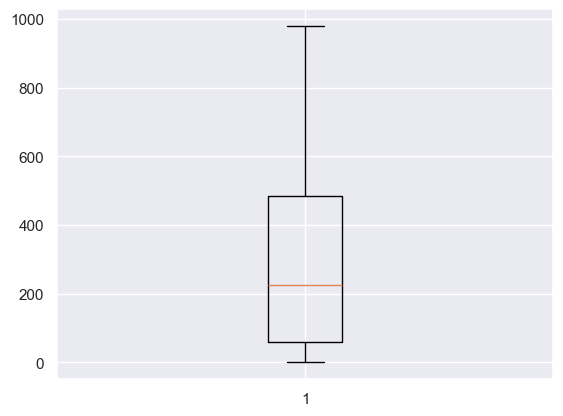

In [37]:
#Using Boxplot
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [38]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-582.5, 1125.5)

In [39]:
df.block = df.block.clip(lower_bound , upper_bound)

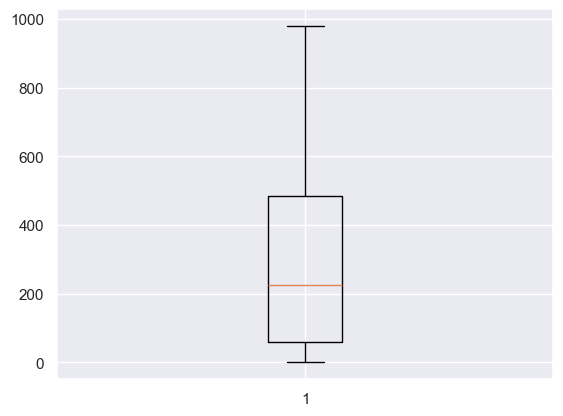

In [40]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

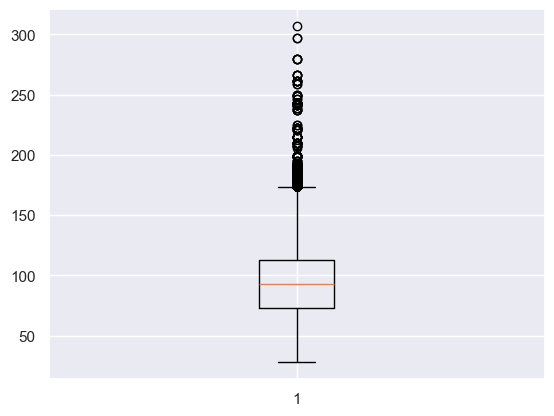

In [41]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [42]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [43]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

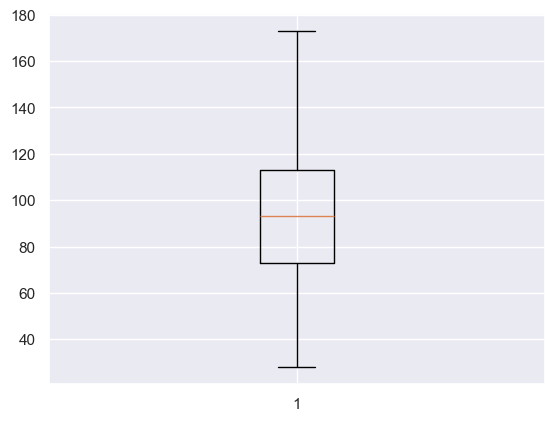

In [44]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

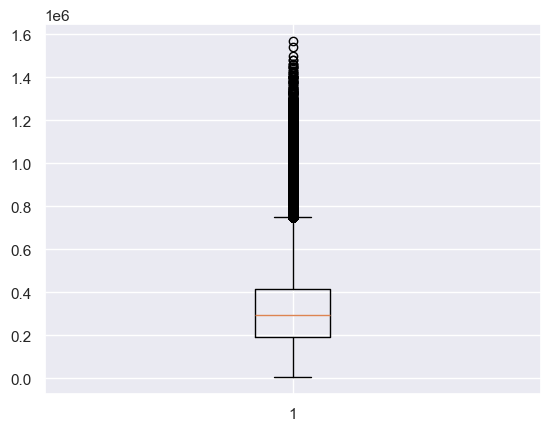

In [45]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [46]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-142500.0, 749500.0)

In [47]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

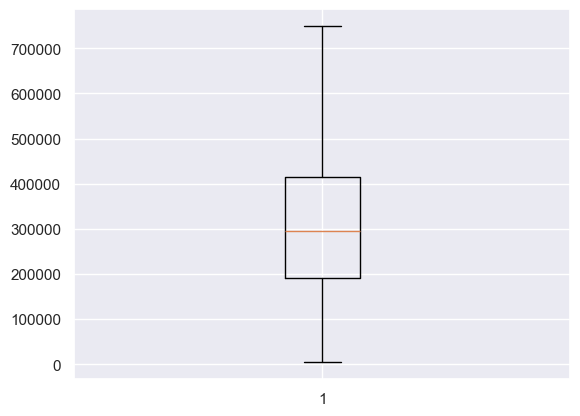

In [48]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

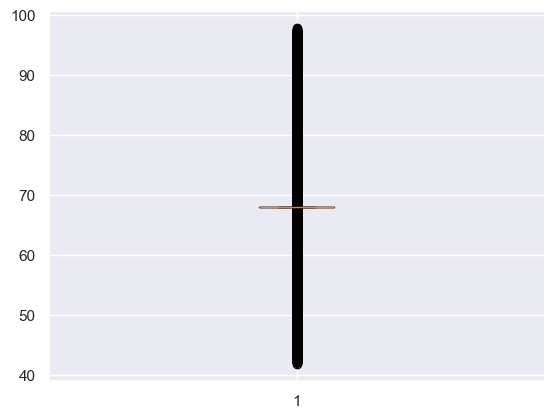

In [49]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [50]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [51]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

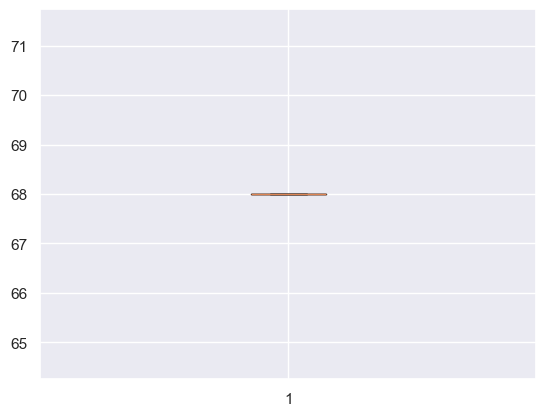

In [52]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

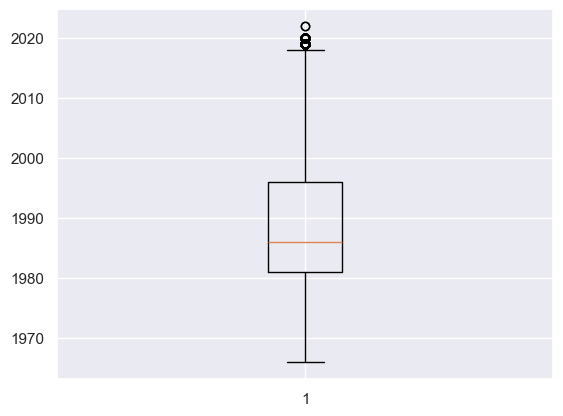

In [53]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [54]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [55]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

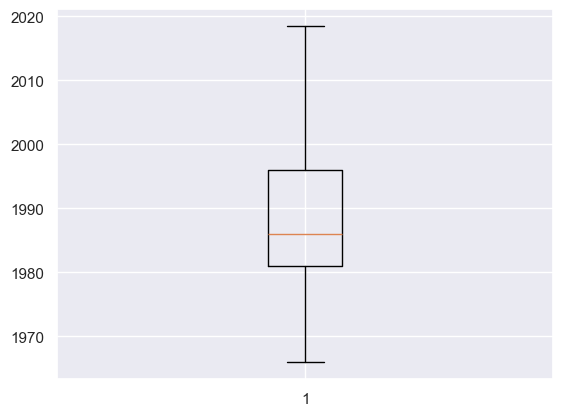

In [56]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

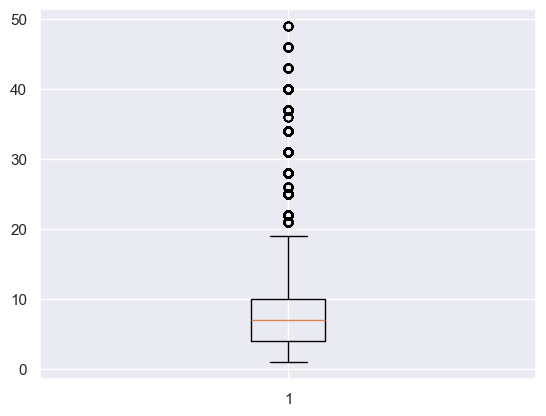

In [57]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [58]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [59]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

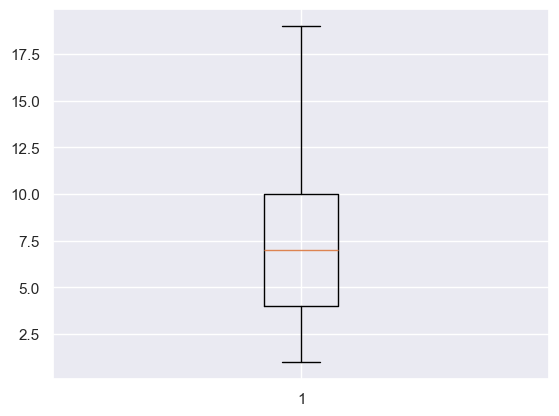

In [60]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

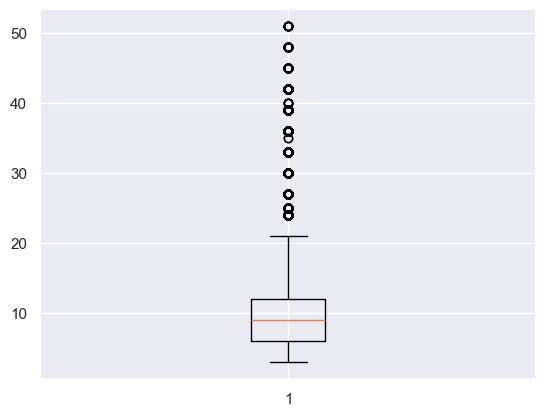

In [61]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [62]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [63]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

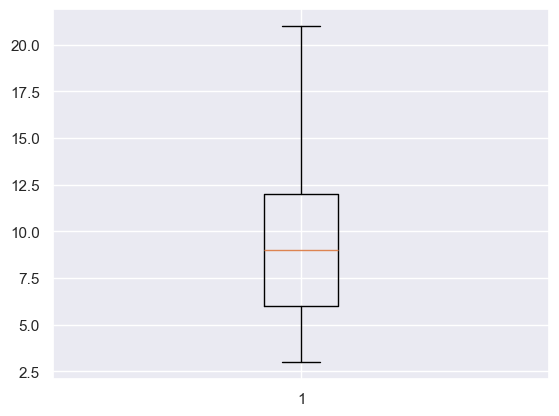

In [64]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [65]:
#EDA - EXPLORATARY DATA ANALYSIS
#Categorical Vs Frequency using BarPlot

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

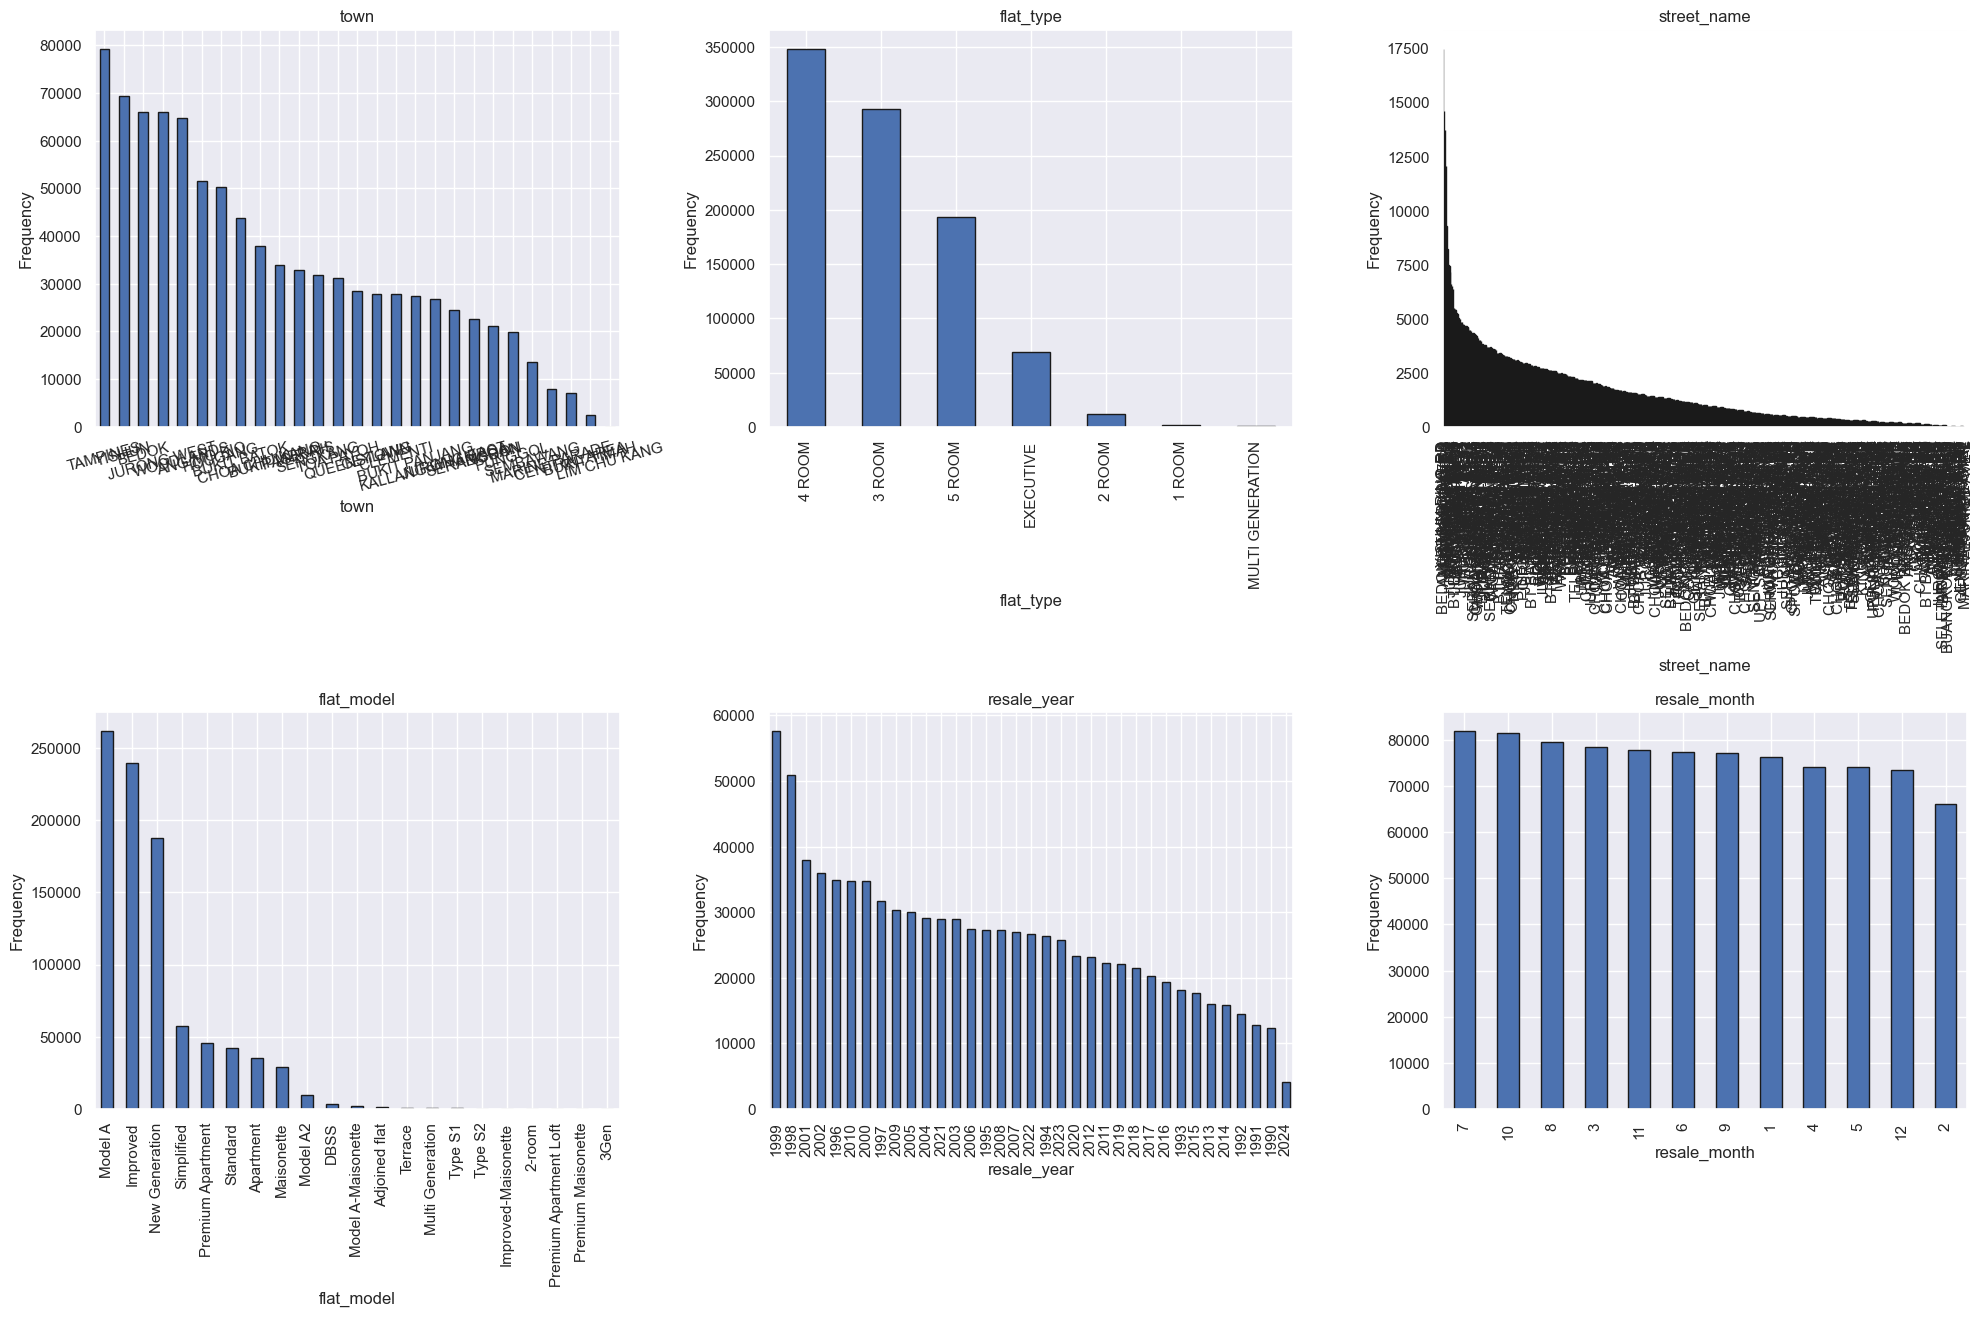

In [66]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

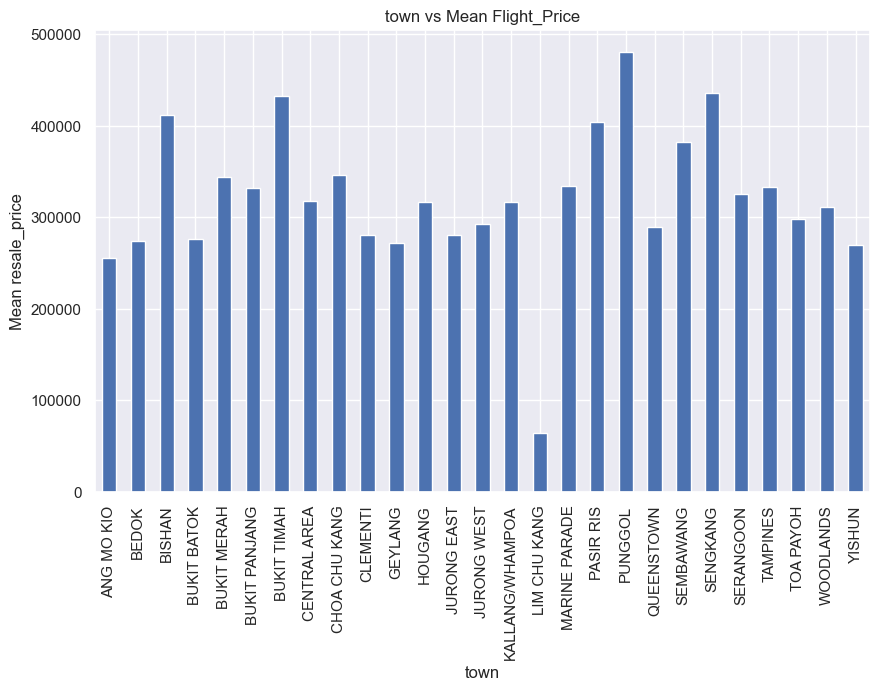

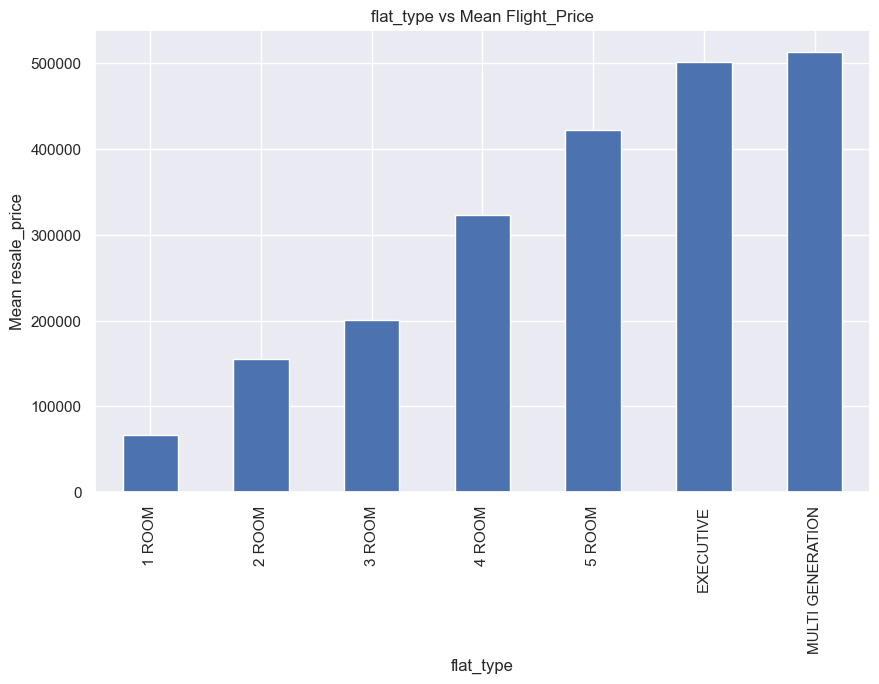

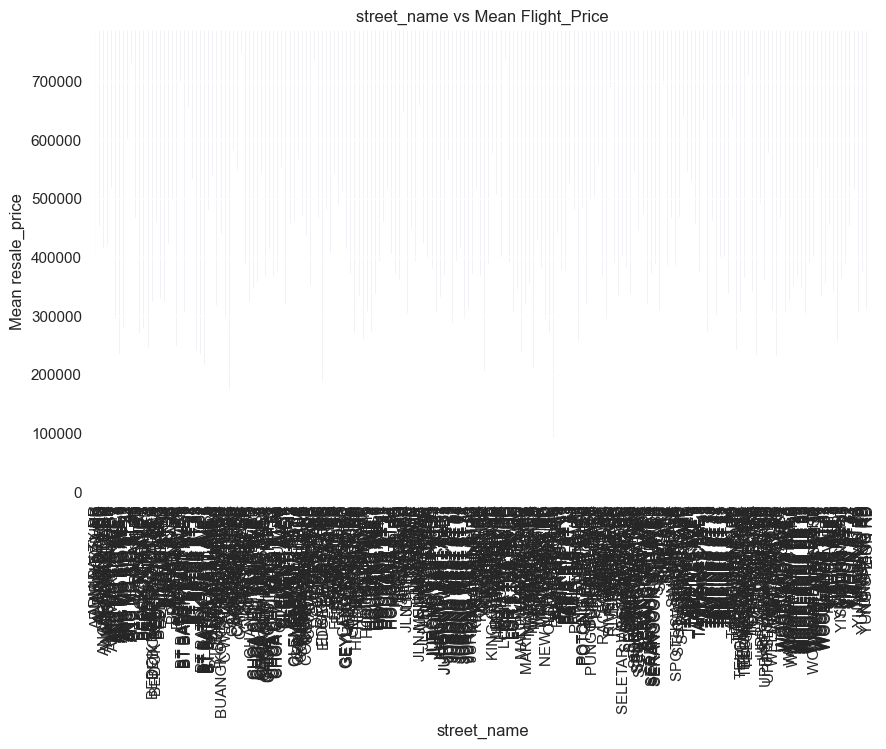

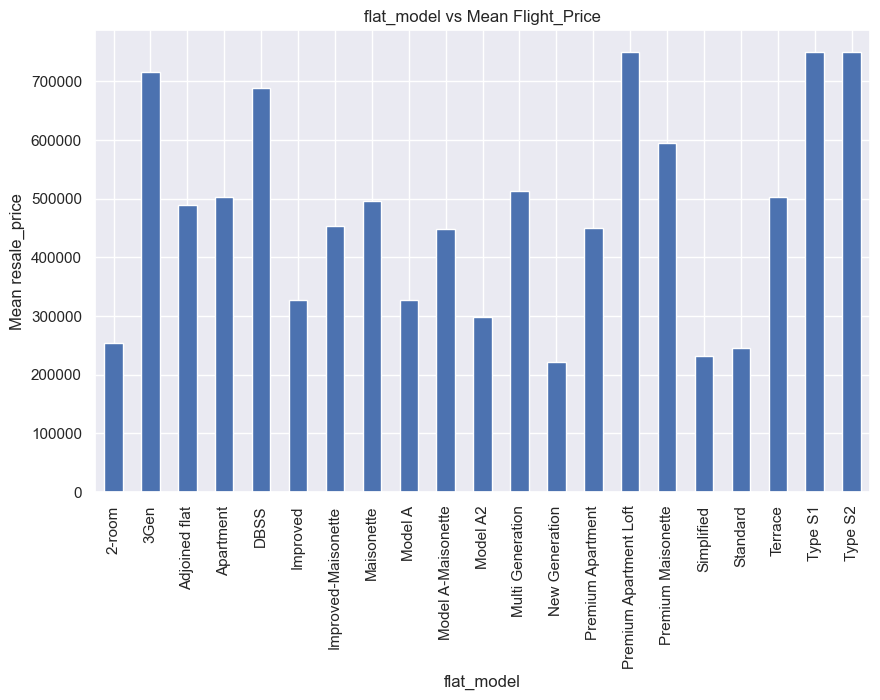

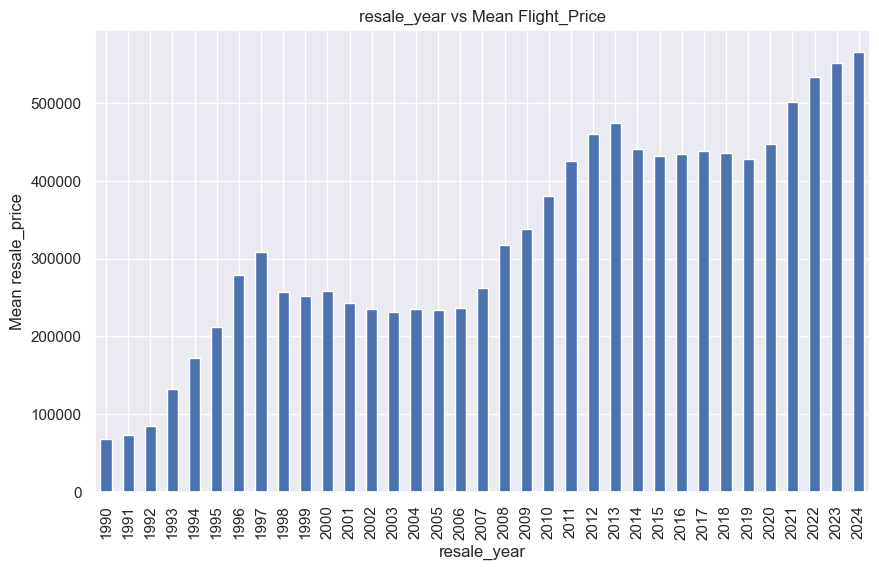

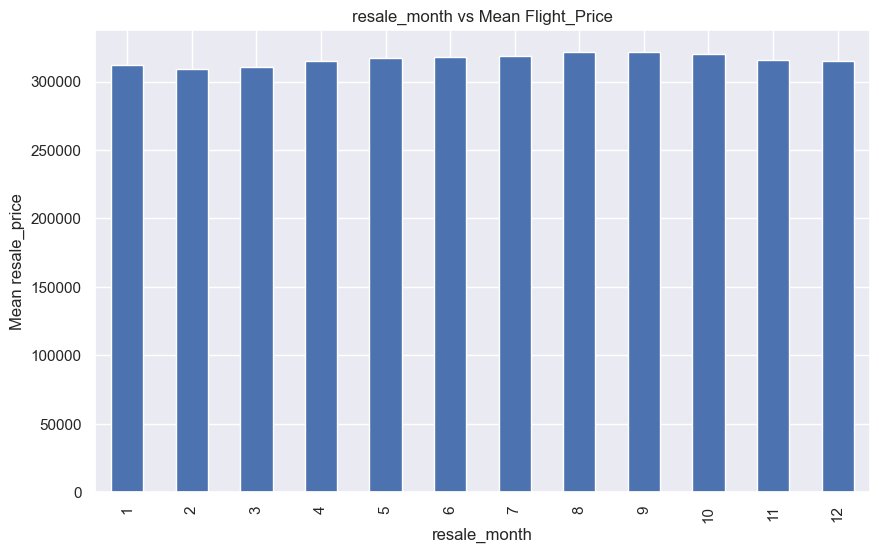

In [67]:
#Feature Vs Target (Categorical Data )
# List of features to plot

features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

In [68]:
#Feature Vs Target (Condinues Data )
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [69]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

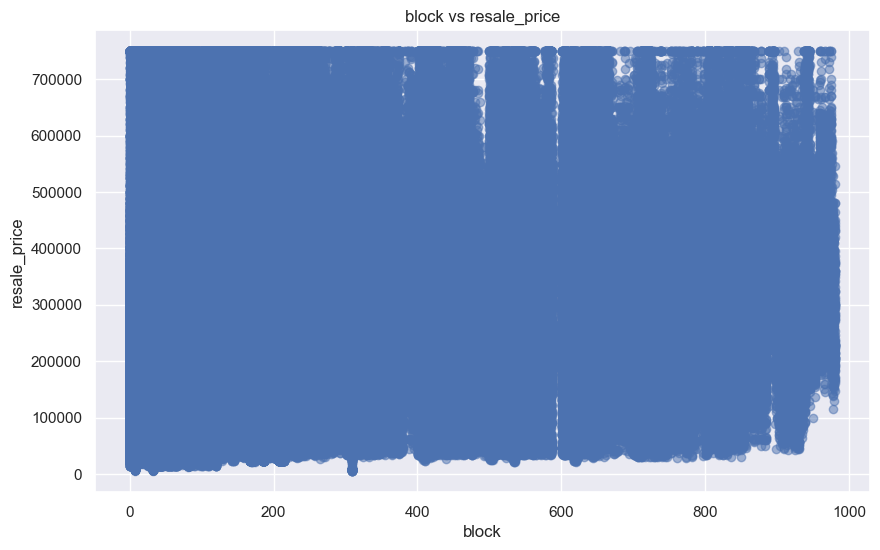

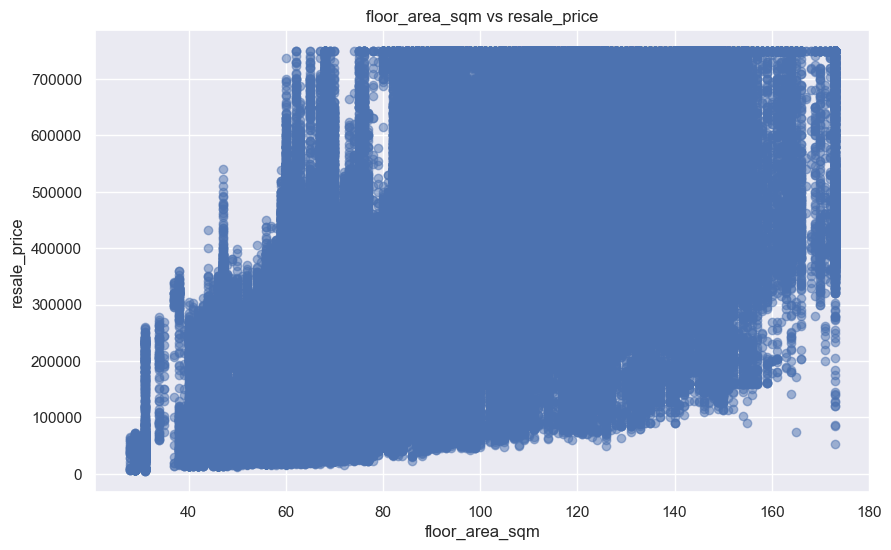

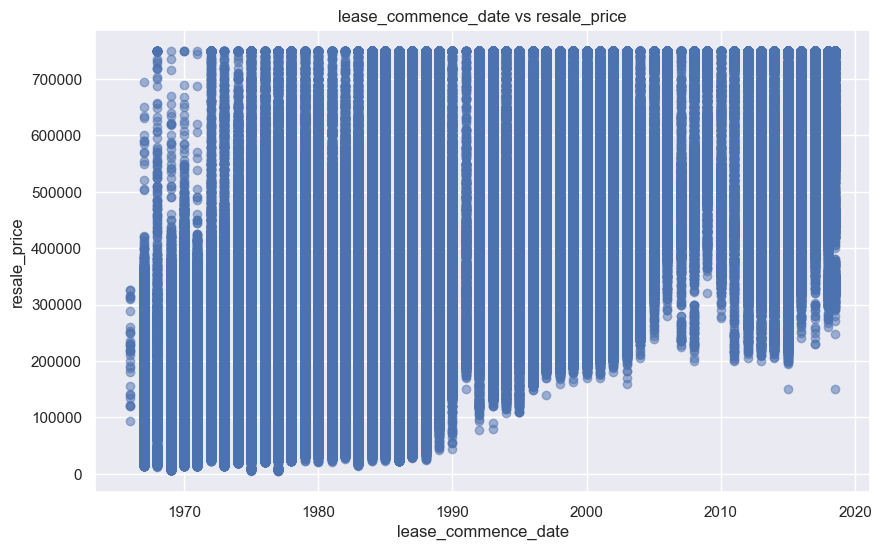

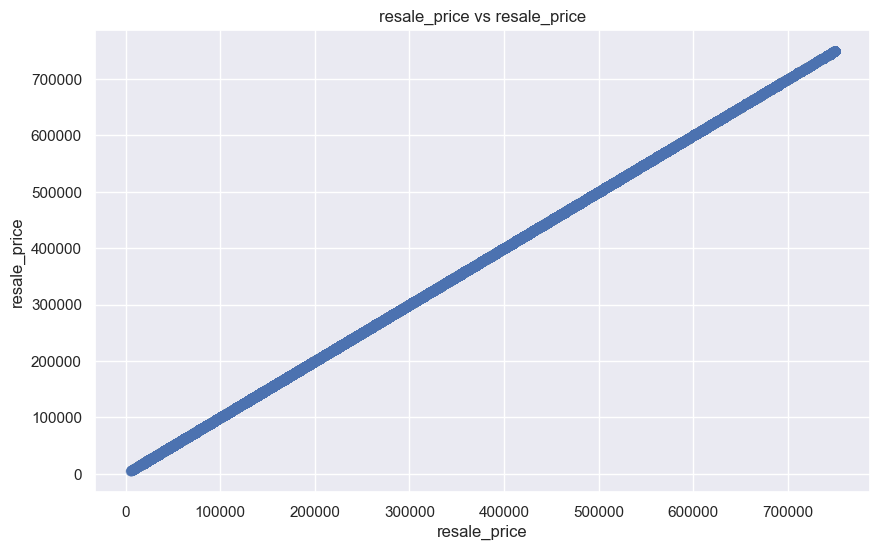

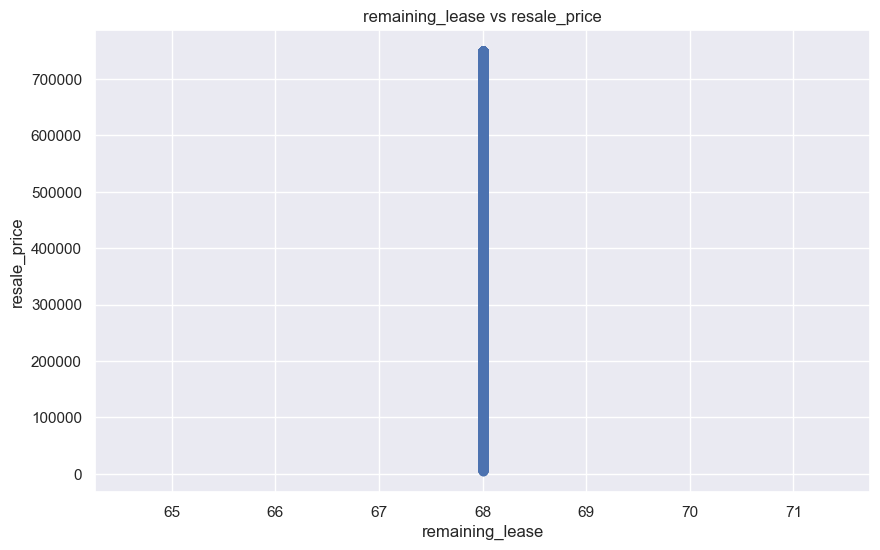

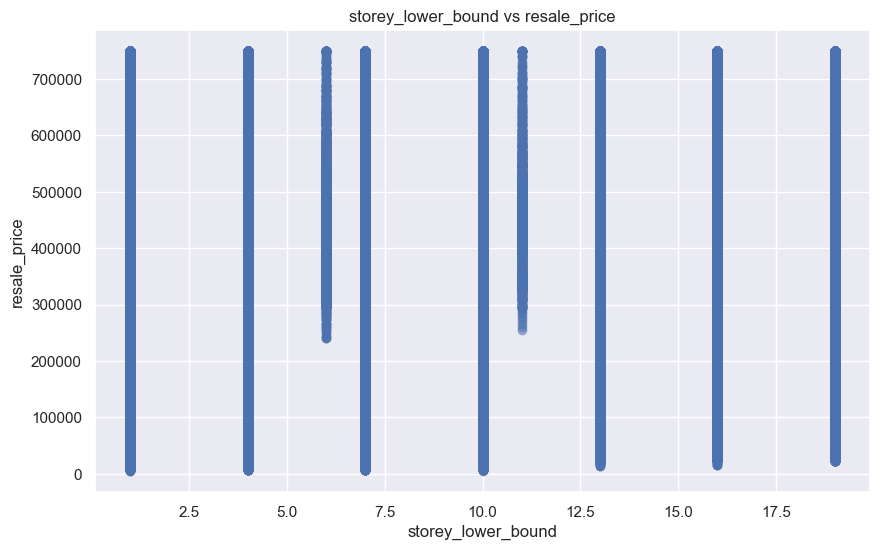

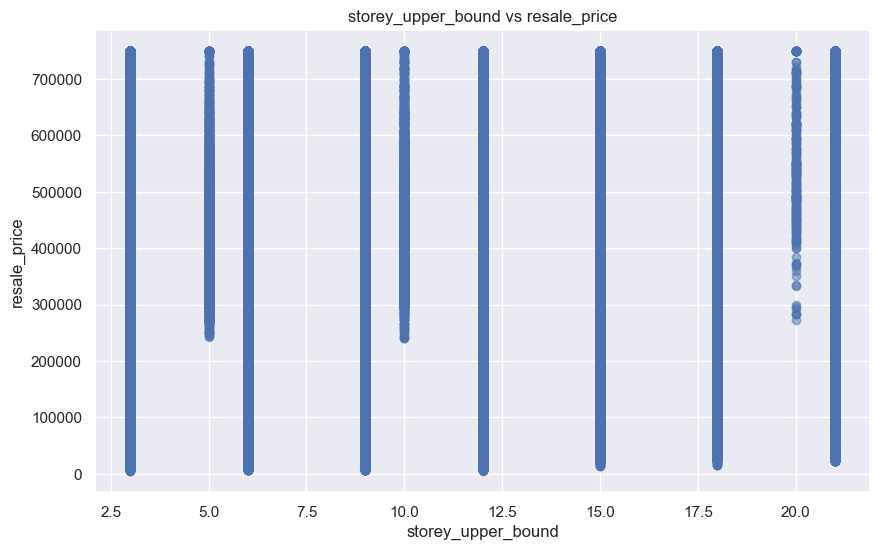

In [70]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [71]:
#Encoding Categorical Variables
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [72]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [73]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [74]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [75]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [76]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [77]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [78]:

# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [79]:
# save the processed data for the deployment
df1.to_csv('final.csv')

In [80]:
#Correlation
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208932,0.051606,0.587832,0.201868,0.163459,0.334597,0.123453,NaN,0.124457,0.004833,-0.019455,-0.019185
flat_type,0.208932,1.000000,0.127834,0.388703,0.954840,0.243407,0.414124,0.605600,NaN,0.102478,0.003651,0.078093,0.078429
block,0.051606,0.127834,1.000000,0.050331,0.187449,-0.001884,0.012039,-0.078932,NaN,-0.113234,0.000218,-0.123669,-0.123716
street_name,0.587832,0.388703,0.050331,1.000000,0.357942,0.354274,0.739807,0.378806,NaN,0.317333,0.009072,0.080607,0.081266
floor_area_sqm,0.201868,0.954840,0.187449,0.357942,1.000000,0.201223,0.392899,0.580622,NaN,0.064420,0.002716,0.044425,0.044615
flat_model,0.163459,0.243407,-0.001884,0.354274,0.201223,1.000000,0.357799,0.246657,NaN,0.163305,0.002632,0.019112,0.019479
lease_commence_date,0.334597,0.414124,0.012039,0.739807,0.392899,0.357799,1.000000,0.541007,NaN,0.427768,0.009351,0.151454,0.151889
resale_price,0.123453,0.605600,-0.078932,0.378806,0.580622,0.246657,0.541007,1.000000,NaN,0.677409,0.015238,0.208964,0.211728
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124457,0.102478,-0.113234,0.317333,0.064420,0.163305,0.427768,0.677409,NaN,1.000000,-0.013975,0.095577,0.097726


<Axes: >

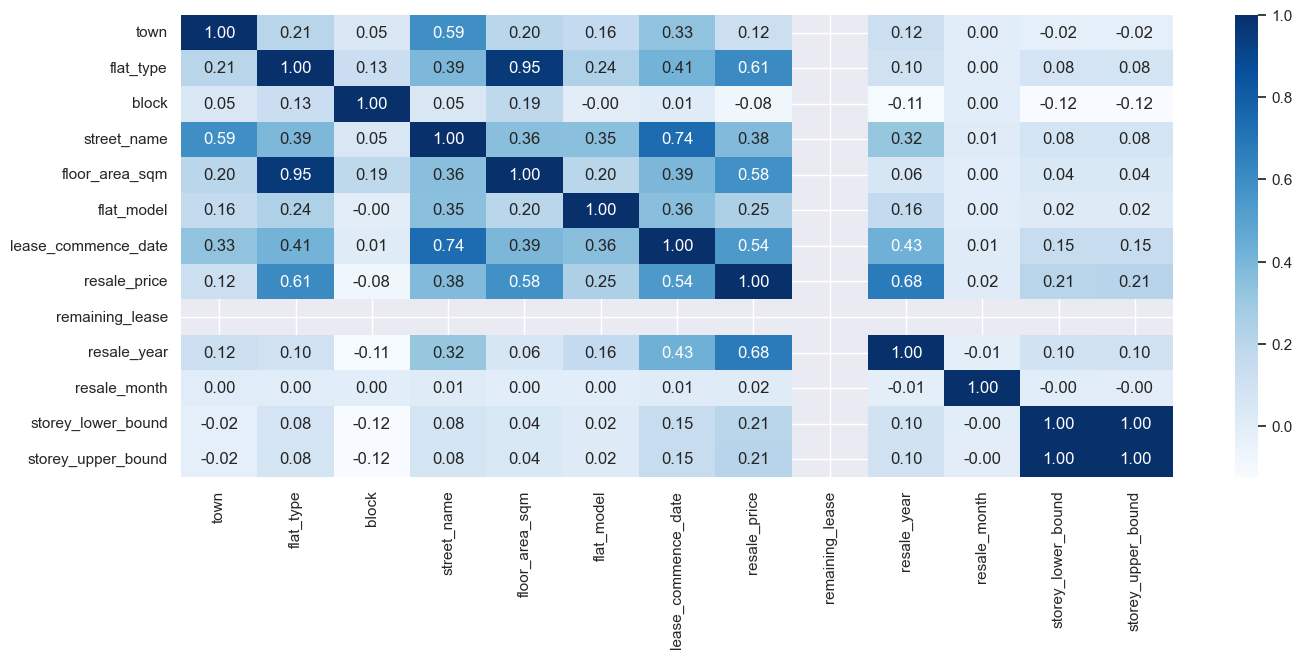

In [81]:
#Heatmap
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [82]:
#RIGHT TO MEACHIN LEARNING
#Split
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [83]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(733764, 12) (183441, 12) (733764,) (183441,)


In [84]:
#Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.33966319, -1.06877096,  1.52558317, ..., -0.16739551,
         -0.57900449, -0.58242167],
        [-0.21139957,  1.03930868,  0.41689026, ..., -0.75227505,
          1.44610491,  1.44305396],
        [-1.49403572, -1.06877096,  0.91218262, ...,  1.29480335,
         -1.25404096, -1.25758021],
        ...,
        [ 1.45602741,  1.03930868, -0.19270034, ..., -0.16739551,
          1.44610491,  1.44305396],
        [ 0.30165488,  1.03930868, -1.07279678, ..., -1.04471483,
          1.44610491,  1.44305396],
        [-1.23750849, -0.01473114,  0.44355985, ...,  0.70992381,
         -0.57900449, -0.58242167]]),
 array([[ 0.68644573,  2.09334851, -0.52416523, ..., -1.3371546 ,
         -0.57900449, -0.58242167],
        [ 0.30165488, -2.12281078, -0.98135819, ..., -0.75227505,
         -0.57900449, -0.58242167],
        [-0.08313596, -0.01473114, -0.29556876, ..., -1.3371546 ,
         -1.25404096, -1.25758021],
        ...,
        [ 0.30165488, -1.06877096, -1.11089619, ...,  

In [85]:
#Model_Fit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [86]:
#Linear Regression
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[535064.53323473 161538.22181804 186506.25645724 ... 210430.21470125
 327269.41855206 132010.83403186]
569520    585000.0
638470    250000.0
236789    152000.0
287983    445000.0
391346    142800.0
            ...   
367704    183500.0
84452      90000.0
395207    160000.0
187706    395000.0
362482    165000.0
Name: resale_price, Length: 183441, dtype: float64


In [87]:
linear_model.score(X_test, y_test)

0.7894530443812531

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7892305937614823

In [89]:
#K Nearest Neighbor Regression
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28709.425235710667
Mean Squared Error (MSE)     : 1752885539.3744776
Root Mean Square Error (RMSE): 41867.4759135833
R-squared (R2) Score         : 0.9328046542231346


In [90]:
# Decision Tree Regression
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17296.2655522551
Mean Squared Error (MSE)     : 650496337.0947193
Root Mean Square Error (RMSE): 25504.82968174301
R-squared (R2) Score         : 0.9750637875002025


In [91]:
#Xg Boost Regression
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16827.319622629326
Mean Squared Error (MSE)     : 554540795.6021649
Root Mean Square Error (RMSE): 23548.689891417842
R-squared (R2) Score         : 0.9787421599010038


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)


Mean Absolute Error (MAE)    : 13890.123245591001
Mean Squared Error (MSE)     : 401063722.85107666
Root Mean Square Error (RMSE): 20026.57541495991
R-squared (R2) Score         : 0.9845067901600751


In [93]:
#best
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9328046542231346
DecisionTreeRegressor 0.9750637875002025
RandomForestRegressor 0.9845067901600751
XGBRegressor 0.9787421599010038

Model: RandomForestRegressor contain Maximum R2_Score: 0.9845067901600751 


In [94]:
#Suggest
rf_regressor.feature_importances_

array([0.04179565, 0.05070647, 0.01497462, 0.02377383, 0.28457263,
       0.00772617, 0.03286546, 0.        , 0.52571053, 0.0066259 ,
       0.00445012, 0.00679863])

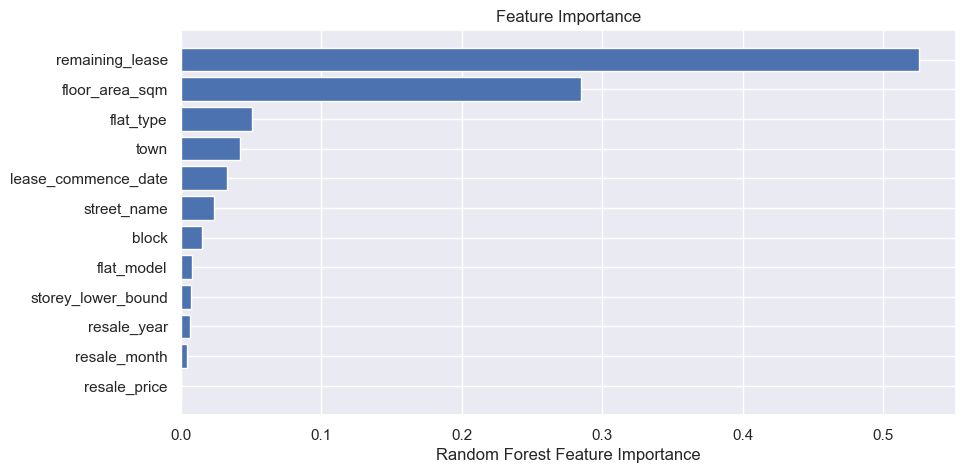

In [95]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


In [96]:
#Saving the model
model=rf_regressor.fit(X_train, y_train)

In [97]:
model

RandomForestRegressor(n_estimators=50, random_state=42)

In [98]:
#converting model to pickle file
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [99]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
666752,13,5,764.0,393,123.0,14,1996.0,470000.0,68.0,2012,7,7,9
486412,1,2,508.0,6,44.0,14,1980.0,117500.0,68.0,2006,2,7,9
564658,11,3,661.0,286,74.0,16,1987.0,217000.0,68.0,2008,12,1,3
342202,14,5,54.0,158,127.0,14,1982.0,418000.0,68.0,2001,7,10,12
906016,27,4,2.0,548,93.0,24,2017.0,605000.0,68.0,2023,8,4,6


In [100]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [101]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([474020.  , 119446.  , 230078.  , 404488.  , 621676.64])